# Testing of Implementations regarding my Bachelor Thesis
# "Improving the Robustness of Radar-Based Heart Sound Detection"

In [1]:
from empkins_io.datasets.d03.micro_gapvii import MicroBaseDataset
from empkins_micro.emrad.preprocessing.pre_processing_algorithms import *
from empkins_micro.emrad.feature_extraction.feature_generation_algorithms import *
from empkins_micro.emrad.label_generation.label_generation_algorithms import *

import pandas as pd
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

<span style="color:#FF7F50">Test the correct index creation using the HeartbeatDetectionData class</span>

<span style="color:#FF7F50">This class inherits from the MicroBaseDataset class and extends its functionality with methods more specifically/uniquely related to the project of my bachelor's thesis!</span>

In [3]:
base_path_str = r"C:\Users\clark\Documents\Studium\Bachelorarbeit\data"
test_data = MicroBaseDataset(Path(base_path_str), use_cache=False)
index = test_data.create_index()
index


,subject,condition,phase
0,VP_01,tsst,Prep
1,VP_01,tsst,Pause_1
2,VP_01,tsst,Talk
3,VP_01,tsst,Pause_2
4,VP_01,tsst,Pause_3
...,...,...,...
715,VP_45,ftsst,Pause_2
716,VP_45,ftsst,Pause_3
717,VP_45,ftsst,Math
718,VP_45,ftsst,Pause_4


In [6]:
test_data

,subject,condition,phase
0,VP_01,tsst,Prep
1,VP_01,tsst,Pause_1
2,VP_01,tsst,Talk
3,VP_01,tsst,Pause_2
4,VP_01,tsst,Pause_3
...,...,...,...
715,VP_45,ftsst,Pause_2
716,VP_45,ftsst,Pause_3
717,VP_45,ftsst,Math
718,VP_45,ftsst,Pause_4


<span style="color:#FF7F50">Create a subset of the whole Dataset.</span>

<span style="color:#FF7F50">This subset is necessary for further analysis</span>

In [21]:
subset = test_data.get_subset(subject = "VP_01", condition = "ftsst")
subset

,subject,condition,phase
0,VP_01,ftsst,Prep
1,VP_01,ftsst,Pause_1
2,VP_01,ftsst,Talk
3,VP_01,ftsst,Pause_2
4,VP_01,ftsst,Pause_3
5,VP_01,ftsst,Math
6,VP_01,ftsst,Pause_4
7,VP_01,ftsst,Pause_5


In [10]:
subset.groupby(groupby_cols=["subject", "condition"]).groups

[MicroBaseDataset(subject='VP_01', condition='ftsst')]

In [20]:
list(set(subset.create_group_labels(label_cols=["subject", "condition"])))[0][1]

'ftsst'

<span style="color:#FF7F50">Of the above subset, get the raw radar data</span>

In [5]:
radar_data, fs = subset.emrad
radar_data.columns.get_level_values(0).unique()

Index(['rad1', 'rad2'], dtype='object', name='node')

In [8]:
radar_data

node                                   rad1                              \
channel                                   I          Q Sync_In Sync_Out   
date (Europe/Berlin)                                                      
2022-12-21 13:22:33+01:00        -1589048.0 -3265592.0     0.0      1.0   
2022-12-21 13:22:33.000512+01:00 -1589230.0 -3265809.0     0.0      1.0   
2022-12-21 13:22:33.001024+01:00 -1589060.0 -3265942.0     0.0      1.0   
2022-12-21 13:22:33.001536+01:00 -1588942.0 -3266109.0     0.0      1.0   
2022-12-21 13:22:33.002048+01:00 -1588920.0 -3265964.0     0.0      1.0   
...                                     ...        ...     ...      ...   
2022-12-21 13:45:05.168960+01:00        NaN        NaN     NaN      NaN   
2022-12-21 13:45:05.169472+01:00        NaN        NaN     NaN      NaN   
2022-12-21 13:45:05.169984+01:00        NaN        NaN     NaN      NaN   
2022-12-21 13:45:05.170496+01:00        NaN        NaN     NaN      NaN   
2022-12-21 13:45:05.171008+01:00        NaN        NaN     NaN      NaN   

node                                rad2                           
channel                                I       Q Sync_In Sync_Out  
date (Europe/Berlin)                                               
2022-12-21 13:22:33+01:00        -722590  159876       0        1  
2022-12-21 13:22:33.000512+01:00 -722607  159935       0        1  
2022-12-21 13:22:33.001024+01:00 -722454  159756       0        1  
2022-12-21 13:22:33.001536+01:00 -723029  160062       0        1  
2022-12-21 13:22:33.002048+01:00 -722576  159792       0        1  
...                                  ...     ...     ...      ...  
2022-12-21 13:45:05.168960+01:00 -242997    6324       0        0  
2022-12-21 13:45:05.169472+01:00 -243143    6365       0        0  
2022-12-21 13:45:05.169984+01:00 -243205    6282       0        0  
2022-12-21 13:45:05.170496+01:00 -243053    6465       0        0  
2022-12-21 13:45:05.171008+01:00 -243274    6251       0        0  

[2640960 rows x 8 columns]

In [9]:
fs

1953.125

<span style="color:#FF7F50">Get the raw biopac data for the subset and only look at the ECG part</span>

In [10]:
subset.biopac['ecg']

date (Europe/Berlin)
2022-12-21 13:22:38.440000+01:00       0.256348
2022-12-21 13:22:38.441000+01:00       0.254211
2022-12-21 13:22:38.442000001+01:00    0.257568
2022-12-21 13:22:38.443000002+01:00    0.261841
2022-12-21 13:22:38.444000003+01:00    0.263672
                                         ...   
2022-12-21 13:45:11.285999997+01:00    0.018921
2022-12-21 13:45:11.286999998+01:00    0.013428
2022-12-21 13:45:11.287999999+01:00    0.014038
2022-12-21 13:45:11.288999999+01:00    0.021973
2022-12-21 13:45:11.290000+01:00       0.021362
Name: ecg, Length: 1352850, dtype: float64

In [11]:
max(radar_data["rad1"]["Sync_In"])

1.0

<span style="color:#FF7F50">Plot the Sync-In channel of radar sensor 1 for the subset</span>

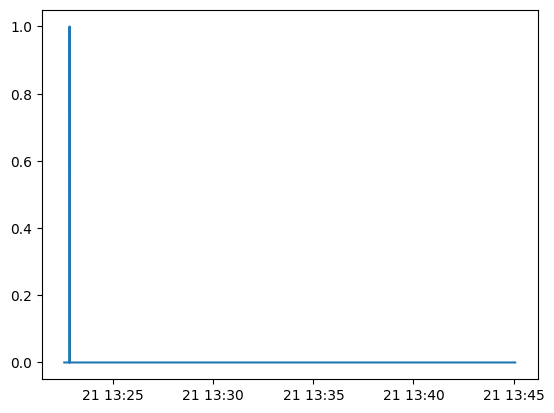

In [12]:
plt.plot(radar_data["rad1"]["Sync_In"])

<span style="color:#FF7F50">Synchronize Biopac and Radar Data (-> Cut to sync start), align the sampling rates to 1000Hz, align the signals to have the same time-index, and cut away everything after the end of Pause_5
</span>

In [8]:
subset.groupby(groupby_cols=["subject", "condition"]).groups

[MicroBaseDataset(subject='VP_01', condition='tsst'),
 MicroBaseDataset(subject='VP_01', condition='ftsst'),
 MicroBaseDataset(subject='VP_02', condition='tsst'),
 MicroBaseDataset(subject='VP_02', condition='ftsst'),
 MicroBaseDataset(subject='VP_03', condition='tsst'),
 MicroBaseDataset(subject='VP_03', condition='ftsst'),
 MicroBaseDataset(subject='VP_04', condition='tsst'),
 MicroBaseDataset(subject='VP_04', condition='ftsst'),
 MicroBaseDataset(subject='VP_05', condition='tsst'),
 MicroBaseDataset(subject='VP_05', condition='ftsst')]

In [34]:
synced_data = subset.emrad_biopac_synced_and_sr_aligned

In [35]:
synced_data.keys()

dict_keys(['Biopac_aligned__resampled_', 'rad1_aligned__resampled_', 'rad2_aligned__resampled_'])

In [10]:
synced_data

{'Biopac_aligned__resampled_':                                           ecg       rsp    icg_mag      sync  \
 date (Europe/Berlin)                                                           
 2022-12-21 13:22:48.853007697+01:00  0.295715  9.999695  49.998474  4.159698   
 2022-12-21 13:22:48.854007697+01:00  0.305481  9.999695  49.998474  0.211945   
 2022-12-21 13:22:48.855007697+01:00  0.328979  9.999695  49.998474  0.212097   
 2022-12-21 13:22:48.856007697+01:00  0.360107  9.999695  49.998474  0.211792   
 2022-12-21 13:22:48.857007697+01:00  0.381470  9.999695  49.998474  0.211945   
 ...                                       ...       ...        ...       ...   
 2022-12-21 13:43:45.995007697+01:00 -0.067444  9.999695  49.998474  0.211945   
 2022-12-21 13:43:45.996007697+01:00 -0.069275  9.999695  49.998474  0.211792   
 2022-12-21 13:43:45.997007697+01:00 -0.071411  9.999695  49.998474  0.211945   
 2022-12-21 13:43:45.998007697+01:00 -0.075378  9.999695  49.998474  0.211945  

<span style="color:#FF7F50">Test the Lowpass and Highpass TPCP-Algorithm classes</span>

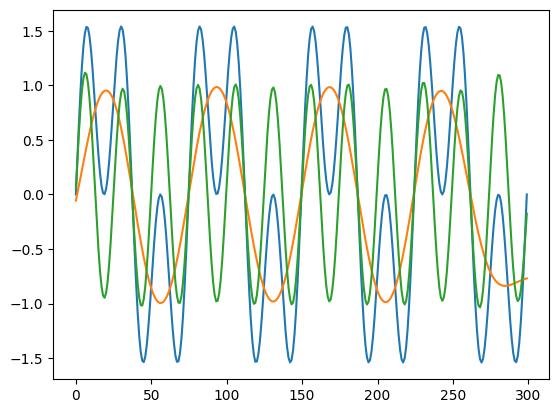

In [7]:
freq_1 = 2
freq_2 = 6
samples = np.linspace(0, 2, 300)
sinus = pd.Series(np.sin(2*np.pi*freq_1*samples) + np.sin(2*np.pi*freq_2*samples))
lowpass_filter = ButterLowpassFilter(3)
highpass_filter = ButterHighpassFilter(3)
lowpass_filter.filter(sinus, 150)
highpass_filter.filter(sinus, 150)
fig, ax = plt.subplots()
ax.plot(sinus)
ax.plot(lowpass_filter.filtered_signal_)
ax.plot(highpass_filter.filtered_signal_)
plt.show()

<span style="color:#FF7F50">Test generating an envelope signal</span>

In [15]:
sample_radar = synced_data["rad1_aligned__resampled_"]
# highpass filtering has been forgotten here
rad_power = np.sqrt(np.square(sample_radar["I"])+np.square(sample_radar["Q"]))
heart_sound_band = ButterBandpassFilter().filter(rad_power, 1000).filtered_signal_
heart_sound_band_envelope = ComputeEnvelopeSignal().compute(heart_sound_band).envelope_signal_
f"Length of the envelope signal is {len(heart_sound_band_envelope)} which corresponds to approx. 21 minutes for a sampling rate of 1000Hz"

'Length of the envelope signal is 1257147 which corresponds to approx. 21 minutes for a sampling rate of 1000Hz'

C:\Users\clark\AppData\Local\Temp\ipykernel_13640\3578582887.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


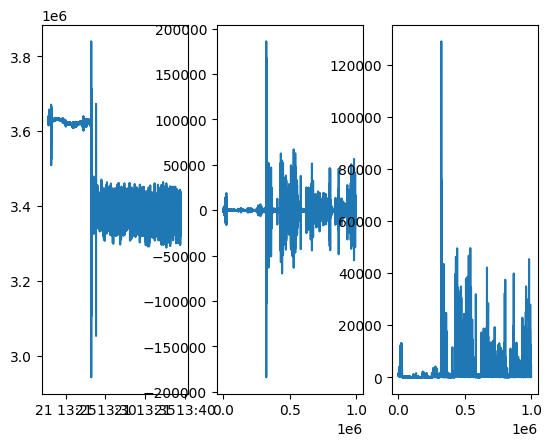

In [12]:
fig, axs = plt.subplots(1, 3, sharey=False)
axs[0].plot(rad_power[2000:1000000])
axs[1].plot(heart_sound_band[2000:1000000])
axs[2].plot(heart_sound_band_envelope[2000:1000000])
fig.show()

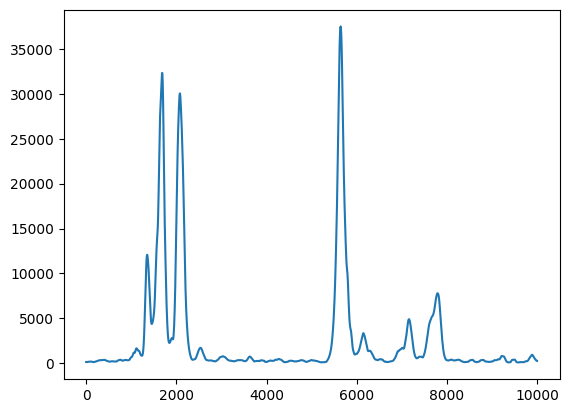

In [13]:
plt.plot(heart_sound_band_envelope[800000:810000])

<span style="color:#FF7F50">Test generating peak gaussians</span>

In [16]:
sample_ecg = synced_data['Biopac_aligned__resampled_']["ecg"]
peak_gaussians = ComputeEcgPeakGaussians()
peaks = peak_gaussians.compute(sample_ecg, 1000.0).peak_gaussians_

In [18]:
f"Length of peak signal is {len(peaks)} which is the same length as the radar envelope feature!"

'Length of peak signal is 1257147 which is the same length as the radar envelope feature!'

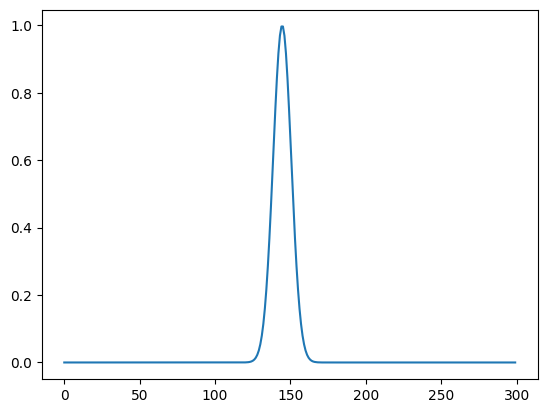

In [19]:
plt.plot(peaks[200:500])

<span style="color:#FF7F50">Test Decimation of Envelope by factor 20</span>

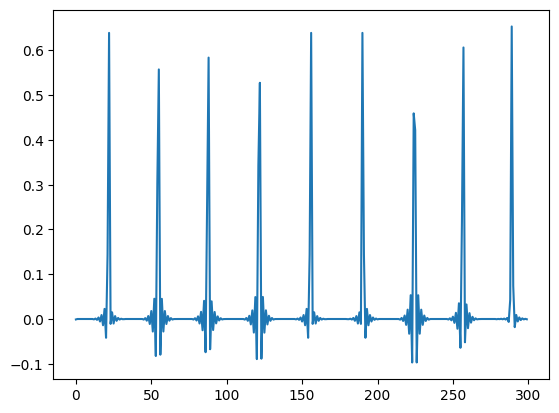

In [35]:
deciamted_envelope = ComputeDecimateSignal().compute(peaks).downsampled_signal_
plt.plot(deciamted_envelope[200:500])

<span style="color:#FF7F50">Steps for processing to follow</span> 
- Decimate the signals to 100 Hz
- ECG guassians are again decimated to 10 Hz after creation
- Create 3-dimensional input vectors => one row per LSTM input batch, one column for each timestep in a batch and +1 in the third dimension per training feature
- Create label vectors => one dimensional gaussian peak signal

In [2]:
# set up training data and labels

# 400 Timesteps representing a time window of 4 seconds as one input
TIMESTEPS = 400
# per one input (4 seconds window) we have one feature being the envelope per radar sensor
num_features_sit = 2
num_features_stand = 4
# and we train with the data of 5 participants (both conditions)
base_path_str = r"C:\Users\clark\Documents\Studium\Bachelorarbeit\data"
test_data = MicroBaseDataset(Path(base_path_str), use_cache=False, exclude_missing_data=True)
test_data.groupby(["subject"])

,subject,condition,phase
subject,,,
VP_01,VP_01,tsst,Prep
VP_01,VP_01,tsst,Pause_1
VP_01,VP_01,tsst,Talk
VP_01,VP_01,tsst,Pause_2
VP_01,VP_01,tsst,Pause_3
...,...,...,...
VP_44,VP_44,ftsst,Pause_2
VP_44,VP_44,ftsst,Pause_3
VP_44,VP_44,ftsst,Math


In [47]:
test_data.index["subject"].astype("string")

0      VP_01
1      VP_01
2      VP_01
3      VP_01
4      VP_01
       ...  
635    VP_44
636    VP_44
637    VP_44
638    VP_44
639    VP_44
Name: subject, Length: 640, dtype: string

In [4]:
# get vp ids for sitting and standing experiment protocol
vp_sitting = [index for index, row in test_data.sit_stand.iterrows() if row["sit_stand"]=="SIT" and index in test_data.index["subject"].values]
vp_standing = [index for index, row in test_data.sit_stand.iterrows() if row["sit_stand"]=="STAND" and index in test_data.index["subject"].values]

In [5]:
subset = test_data.get_subset(subject = vp_sitting[:5], condition = ["tsst", "ftsst"])
subset

,subject,condition,phase
0,VP_01,tsst,Prep
1,VP_01,tsst,Pause_1
2,VP_01,tsst,Talk
3,VP_01,tsst,Pause_2
4,VP_01,tsst,Pause_3
...,...,...,...
75,VP_12,ftsst,Pause_2
76,VP_12,ftsst,Pause_3
77,VP_12,ftsst,Math
78,VP_12,ftsst,Pause_4


In [6]:
grouped_subset = subset.groupby(['subject', 'condition'])
grouped_subset.groups

[MicroBaseDataset(subject='VP_01', condition='tsst'),
 MicroBaseDataset(subject='VP_01', condition='ftsst'),
 MicroBaseDataset(subject='VP_04', condition='tsst'),
 MicroBaseDataset(subject='VP_04', condition='ftsst'),
 MicroBaseDataset(subject='VP_07', condition='tsst'),
 MicroBaseDataset(subject='VP_07', condition='ftsst'),
 MicroBaseDataset(subject='VP_08', condition='tsst'),
 MicroBaseDataset(subject='VP_08', condition='ftsst'),
 MicroBaseDataset(subject='VP_12', condition='tsst'),
 MicroBaseDataset(subject='VP_12', condition='ftsst')]

In [95]:
def preprocess_radar(raw_radar: pd.DataFrame):
    """Preprocess radar data that has been synced and sr aligned already

    Args:
        raw_radar (pd.DataFrame): synced and sr aligned radar of one antenna
    """
    highpassed_radi = ButterHighpassFilter().filter(raw_radar['I'], sample_frequency_hz=1000)
    highpassed_radq = ButterHighpassFilter().filter(raw_radar['Q'], sample_frequency_hz=1000)
    rad_power = np.sqrt(np.square(highpassed_radi.filtered_signal_)+np.square(highpassed_radq.filtered_signal_))  
    heart_sound_radar = ButterBandpassFilter().filter(rad_power, 1000)
    heart_sound_radar_envelope = ComputeEnvelopeSignal().compute(heart_sound_radar.filtered_signal_)
    heart_sound_radar_envelope = ComputeDecimateSignal(10).compute(heart_sound_radar_envelope.envelope_signal_).downsampled_signal_
    mean = heart_sound_radar_envelope.mean(axis=0)
    std = heart_sound_radar_envelope.std(axis=0)
    heart_sound_radar_envelope = (heart_sound_radar_envelope - mean) / std
    return heart_sound_radar_envelope  

In [82]:
def generate_training_input_sitting(dataset:MicroBaseDataset, timesteps:int, stepsize:int):
    res = []
    for group in dataset:
        data_dict = group.emrad_biopac_synced_and_sr_aligned
        heart_sound_band_envelope_rad1 = preprocess_radar(data_dict['rad1_aligned__resampled_'])
        heart_sound_band_envelope_rad2 = preprocess_radar(data_dict['rad2_aligned__resampled_'])
        for i in range(0, len(heart_sound_band_envelope_rad1) - timesteps, stepsize):
            rad1 = heart_sound_band_envelope_rad1[i:(i + timesteps)]
            rad2 = heart_sound_band_envelope_rad2[i:(i + timesteps)]
            rad1 = np.expand_dims(rad1, axis=(1))
            rad2 = np.expand_dims(rad2, axis=(1))
            combined_rad = np.concatenate((rad1, rad2), axis=1)
            res.append(combined_rad)
    return np.array(res)

In [96]:
input_data = generate_training_input_sitting(grouped_subset, 400, 20)

In [101]:
np.save(r"C:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\empkins_micro\emrad\feature_extraction\input_array_five_sitting_vps", input_data)

In [100]:
input_data.shape

numpy.ndarray

In [98]:
data_dict = grouped_subset[0].emrad_biopac_synced_and_sr_aligned
ecg = data_dict["Biopac_aligned__resampled_"]['ecg']
ecg = ComputeDecimateSignal(10).compute(ecg).downsampled_signal_
peak_gaussian_signal = ComputeEcgPeakGaussians().compute(ecg, 100).peak_gaussians_
rad1_env = preprocess_radar(data_dict['rad1_aligned__resampled_'])
f"Shape of gaussian peak signal: {peak_gaussian_signal.shape}; Shape of rad1 envelope: {rad1_env.shape}"  

'Shape of gaussian peak signal: (118623,)\nShape of rad1 envelope: (118623,)'

In [93]:
def generate_training_labels_sitting(dataset:MicroBaseDataset, timesteps:int, stepsize:int):
    res = []
    for group in dataset:
        data_dict = group.emrad_biopac_synced_and_sr_aligned
        downsampled_ecg = ComputeDecimateSignal(10).compute(data_dict['Biopac_aligned__resampled_']['ecg']).downsampled_signal_
        peak_gaussian_signal = ComputeEcgPeakGaussians().compute(downsampled_ecg, 100).peak_gaussians_
        mean = np.mean(peak_gaussian_signal)
        std = np.std(peak_gaussian_signal)
        peak_gaussian_signal = (peak_gaussian_signal - mean) / std
        for i in range(0, len(peak_gaussian_signal) - timesteps, stepsize):
            next_sample = peak_gaussian_signal[i:(i + timesteps)]
            res.append(next_sample)
    return np.array(res)

In [94]:
input_labels = generate_training_labels_sitting(grouped_subset, 400, 20)
input_labels.shape

c:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(59676, 400)

In [102]:
np.save(r"C:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\empkins_micro\emrad\label_generation\label_array_five_sitting_vps", input_labels)

In [7]:
input_data = np.load(r"C:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\empkins_micro\emrad\feature_extraction\input_array_five_sitting_vps.npy")
input_labels = np.load(r"C:\Users\clark\Documents\Studium\Bachelorarbeit\empkins-micro\empkins_micro\emrad\label_generation\label_array_five_sitting_vps.npy")

In [14]:
# import model algorithm and initialize algorithm instance
from empkins_micro.emrad.models.biLSTM import *

# input of shape (400,2), i.e. 400 timesteps and two features (rad1_env and rad2_env)
myFirstBiLSTM = BiLSTM((input_data.shape[1], input_data.shape[2]))
myFirstBiLSTM.self_optimize(input_data[:2,:,:], input_labels[:2,:])

Epoch 1/12
1/1 [==============================] - 15s 15s/step - loss: 0.9569 - val_loss: 0.9568
Epoch 2/12
1/1 [==============================] - 1s 644ms/step - loss: 0.9539 - val_loss: 0.9580
Epoch 3/12
1/1 [==============================] - 1s 630ms/step - loss: 0.9507 - val_loss: 0.9594
Epoch 4/12
1/1 [==============================] - 1s 587ms/step - loss: 0.9389 - val_loss: 0.9621
Epoch 5/12
1/1 [==============================] - 1s 599ms/step - loss: 0.9266 - val_loss: 0.9669
Epoch 6/12
1/1 [==============================] - 1s 590ms/step - loss: 0.9166 - val_loss: 0.9760
Epoch 7/12
1/1 [==============================] - 1s 636ms/step - loss: 0.9112 - val_loss: 0.9937
Epoch 8/12
1/1 [==============================] - 1s 738ms/step - loss: 0.8712 - val_loss: 1.0294
Epoch 9/12
1/1 [==============================] - 1s 708ms/step - loss: 0.8544 - val_loss: 1.0897
Epoch 10/12
1/1 [==============================] - 1s 617ms/step - loss: 0.7921 - val_loss: 1.1651
Epoch 11/12
1/1 [===

BiLSTM(_model=<keras.src.engine.sequential.Sequential object at 0x0000019B1CB07280>, batch_size=128, bi_lstm_units=64, dense_layer_units=400, first_dropout_rate=0.6, input_shape=(400, 2), learning_rate=0.001, mono_lstm_units=128, num_epochs=12, second_dropout_rate=0.6)